# TA Review Session - 2
## Linear Algebra, Regression and Data Analysis in Python
### FINM September Launch

Maneet Singh - TA

maneetsingh@uchicago.edu

## Recap

In the last TA session, we discussed OLS Model of the form:

$$
y = x'b + e
$$

where $b$ is given by:

$$
b = (x'x)^{-1}x'y
$$


**What were some of the issues with calculating $(x'x)^{-1}$? Think of a situation where a lot of factors are considered.**

Let's look at an example to see how this is a practical problem.

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('sp500_returns.xlsx', sheet_name=2).set_index('date')
data.index = pd.to_datetime(data.index)
display(data.head())

spy = pd.read_excel('sp500_returns.xlsx', sheet_name=3).set_index('date')[['SPY']]
spy.index = pd.to_datetime(spy.index)
display(spy.head())

,A,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15,-0.038351,-0.008719,0.001752,-0.052980,0.003094,0.010897,0.015026,-0.003201,-0.083746,-0.002688,...,-0.074549,0.010911,0.008843,0.038693,-0.008773,-0.040441,-0.008857,-0.004629,-0.045570,-0.091870
2016-01-22,0.023444,0.000965,0.044174,-0.019080,-0.012581,0.029918,0.005159,0.031311,0.054588,0.040940,...,-0.015492,0.013704,0.003561,-0.013019,0.018233,0.031839,0.028172,-0.019094,-0.000884,-0.037156
2016-01-29,-0.008689,0.052759,-0.040244,-0.015823,-0.054460,0.032276,-0.005578,0.048269,0.063797,0.024411,...,0.007473,0.138077,0.043409,0.016717,0.023818,0.056420,0.049144,0.001110,0.069027,0.054398
2016-02-05,-0.042761,-0.053338,-0.028864,-0.054265,-0.011623,-0.062250,-0.111410,-0.075009,-0.036210,-0.021423,...,-0.063257,-0.080635,0.034275,0.028645,0.001698,0.019750,-0.036064,-0.042818,-0.050000,-0.046298
2016-02-12,0.004992,-0.022021,-0.000323,0.010744,-0.007485,-0.043144,-0.031944,-0.003614,-0.038858,0.005289,...,-0.057941,0.116782,-0.017961,0.021048,-0.072216,0.010364,-0.034690,-0.033996,0.033635,-0.029592


,SPY
date,
2016-01-15,-0.021430
2016-01-22,0.014429
2016-01-29,0.016800
2016-02-05,-0.029789
2016-02-12,-0.007023


Let's run the following regression:

$$
r^{SPY}_t = \alpha + \sum^{451}_{i=1}\beta^ir^i_t + \epsilon_t
$$

In [16]:
X = sm.add_constant(data.sample(n = 330, axis = 1))
y = spy

ols_model = sm.OLS(endog=y, exog=X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     93.86
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           0.000225
Time:                        08:29:10   Log-Likelihood:                 2273.0
No. Observations:                 335   AIC:                            -3884.
Df Residuals:                       4   BIC:                            -2622.
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.382      0.7

In [20]:
print('Condition Number of Design Matrix: {:,.2f}'.format(np.linalg.cond(X)))
print('Condition Number of Covariance Matrix: {:,.2f}'.format(np.linalg.cond(np.dot(X.transpose(), X))))

Condition Number of Design Matrix: 6,156.03
Condition Number of Covariance Matrix: 37,896,688.39


**What do you notice?**

The high condition number contributes to numerical instability of the regression model. A small change in the design matrix $X$, cause a large change in the coefficient vector $\beta$. Such a model can be expected to have very poor out of sample performance.

Let's examine the problem using $VIF$:

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
display(pd.DataFrame([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], \
                     index=X.columns, columns=['VIF']))

,VIF
const,26.397941
KMB,114.253428
ENPH,109.954938
VNO,575.386751
BR,220.845190
...,...
PPL,276.363638
TGT,80.719437
PG,521.003249
CHD,180.397096


Clearly, multicollinearity is a big problem in this model.

**Agenda**

In today's session, we will discuss:

- What is principal component analysis 


- How can we use it solve the problem of multicollinearity


- What is the role of **eigendecomposition** in PCA


- Steps to calculate PCA


- Practical applications of PCA

## Recap of Principal Component Analysis

###### Reference: data_analysis_2022_machinelearning.pdf

Principal Component Analysis is a way to reduce the dimensionality of the dataset. 

The procedure helps us reproduce the data in a rotated vector space such that the projections along the orthonormal basis in the new vector space are uncorrelated. 

It also ranks these orthonormal basis in the order of *importance* which allows us to reduce the basis vector to represent an acceptable level of variation.


PCA is widely used for:

1. Data Compression


2. Efficient Model Development


3. Better Visualizations


Let's take an example from the previous dataset:

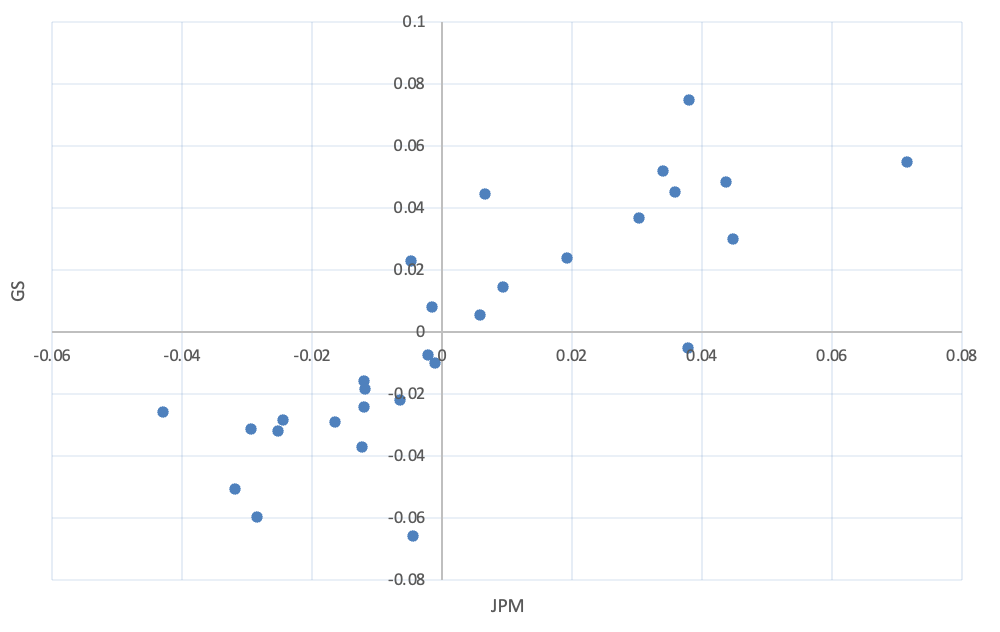

The objective of PCA is to find the dimensions along which the projection variance is maximized.


Assume $w^{\rightarrow}$ to be a direction vector along which the projection variance is maximized. One such vector is shown below in green:

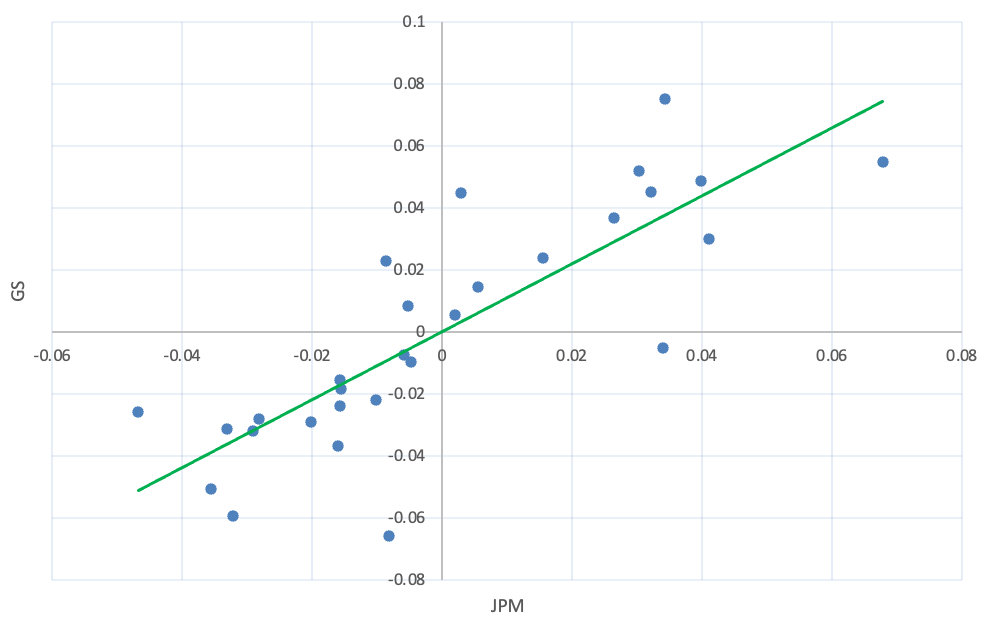

Remember, projection is just the dot product of the vector with the basis vector:

$$
P = (X_i.w^{\rightarrow})*w^{\rightarrow}
$$


One way to mazimize the variance is to calculate the variance of the projection and maximize it (Please refer to the notes slide 33)

Another way is to minimize the **reconstruction error**, as shown below:

$$
arg min \{error_{rc}\} = arg min \{\sum_i||X_i - (X_i.w^{\rightarrow})*w^{\rightarrow}||\}
$$

Reconstruction Errors are shown as red in the image below. Notice how these are different from the residuals of a regression

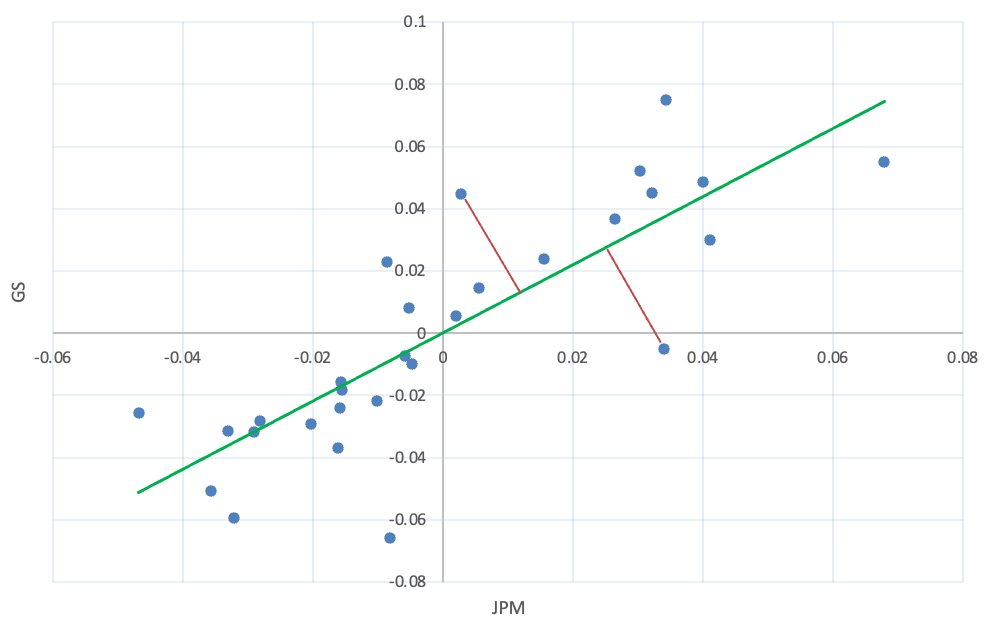


So we keep rotating the line above untill we minimize the argument above. This gives us our **first principal component**.

Other principal components $(v^{\rightarrow})$ are found by iteratively solving the above equation but with the following additional constraint:

$$
(v^{\rightarrow}).(w^{\rightarrow}) = 0
$$

Image below shows the data projected on the principal components $(v^{\rightarrow})$ and $(w^{\rightarrow})$ found in such manner. Notice how the correlation between variables in low.

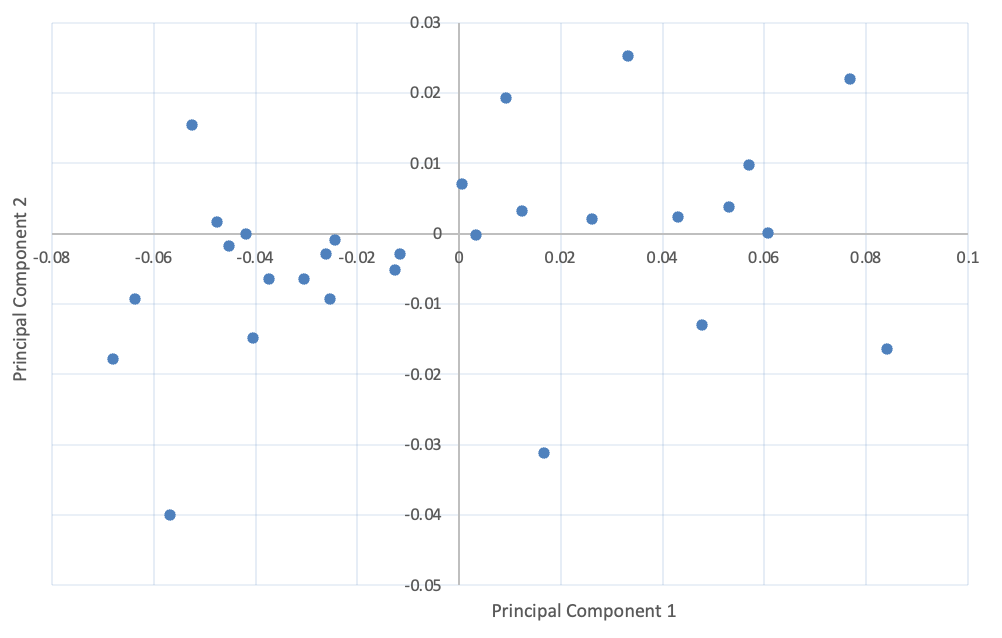

**This problem was simple in two dimensions, what if you have a 1000 dimensions? The algorithm becomes very slow if the dimensions are increased. Fortnately there is a solution...** 

Without using mathematical rigor, you can observe geometerically that if a design matrix $X$ rotates the principal direction vector $w^{\rightarrow}$, then the resulting component will not have minimum variance (as we discussed above)

Hence, the algorithm select $w^{\rightarrow}$ in such a way that the operation $X.w^{\rightarrow}$ only causes a scalar change $\lambda$ in $w^{\rightarrow}$

$$
X.w^{\rightarrow} = \lambda.w^{\rightarrow}
$$


This is also the characteristic equation for $X$, which means that principal directions will be given by **eigenvectors** and the amount by which the principal direction is stretched (or the amount of variance captured) is given by the **eigenvalues**.

For a complete mathematical proof, refer: https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf


To find eigenvalues and eigenvectors for a large dimension matrix, we use **singular value decomposition**

### Singular Value Decomposition:

We can decompose a full-rank matrix $X$ on $\mathbb{R}^{mxn}$ as follows:

$$
X = U\sum V^T
$$

where $V$ is an n×n matrix that its columns are $v_i$. So:

$$
V = [v_1, v_2,...v_n]
$$

Where $v_i$ are orthogonal and normalized vectors an orthonormal set. 

$\sum$ is mxn matrix such that $\sum _{ij} = \lambda$ for all $i=j$ and 0 otherwise.

and $U$ is an orthonormal basis $\{u_1, u_2, … ,u_m\}$


This process helps resolve the numerical instability of calculating the variance covariance matrix, needed for eigendecomposition.

## Steps of PCA

##### Step 1: Standardize the data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca_sample = X[['JPM', 'GS']]
scaler.fit(pca_sample)
pca_scaled_sample = scaler.transform(pca_sample)

#### Step 2:  Perform Singular Value Decomposition (Or estimate the eigenvalues of eigenvectors)

In [68]:
from numpy.linalg import svd 
U, S, Vt = svd(pca_scaled_sample, full_matrices=False)

#### Step 3:  Calculate PC using $U.S$

In [69]:
pca_factors = U @ np.diag(S)
pca_factors

array([[-1.51491135e+00,  2.39831925e-01],
       [-6.80498033e-03, -1.72746649e-01],
       [ 1.18813070e+00,  3.06479563e-01],
       [-1.15480522e+00, -3.01546793e-02],
       [-1.26928512e+00,  9.84121932e-01],
       [ 8.14418552e-02,  3.26112061e-03],
       [ 1.74099691e-01, -4.71605949e-01],
       [ 1.46815941e+00, -1.52598222e-02],
       [-6.24664064e-01,  7.50172064e-02],
       [ 6.25545530e-01, -5.42848249e-02],
       [-8.84519348e-01,  1.64677457e-01],
       [ 7.36561986e-01, -6.22368685e-01],
       [-1.59722391e+00,  4.47563785e-01],
       [ 2.07712096e+00,  3.83658851e-01],
       [ 1.35085032e+00, -2.47511727e-01],
       [-5.85214547e-01,  2.78655647e-02],
       [-1.08974591e+00,  5.27680347e-02],
       [-5.87296332e-01,  2.30103127e-01],
       [ 4.84993882e-01,  7.55703098e-01],
       [ 1.03579101e+00, -6.65077974e-02],
       [-7.22392010e-01,  1.63678547e-01],
       [-9.38885641e-01,  3.69241945e-01],
       [-1.01355562e+00,  8.35816319e-03],
       [-1.

## Another Method in Python Using sklearn

In [79]:
from sklearn.decomposition import PCA

sample = X[['JPM', 'GS']]
scaler.fit(sample)

sample = pd.DataFrame(scaler.transform(sample))

pca = PCA(svd_solver='full')

pca.fit(sample.values)

pca_factors = pca.transform(sample.values)

pca_factors

array([[-1.51491135e+00, -2.39831925e-01],
       [-6.80498033e-03,  1.72746649e-01],
       [ 1.18813070e+00, -3.06479563e-01],
       [-1.15480522e+00,  3.01546793e-02],
       [-1.26928512e+00, -9.84121932e-01],
       [ 8.14418552e-02, -3.26112061e-03],
       [ 1.74099691e-01,  4.71605949e-01],
       [ 1.46815941e+00,  1.52598222e-02],
       [-6.24664064e-01, -7.50172064e-02],
       [ 6.25545530e-01,  5.42848249e-02],
       [-8.84519348e-01, -1.64677457e-01],
       [ 7.36561986e-01,  6.22368685e-01],
       [-1.59722391e+00, -4.47563785e-01],
       [ 2.07712096e+00, -3.83658851e-01],
       [ 1.35085032e+00,  2.47511727e-01],
       [-5.85214547e-01, -2.78655647e-02],
       [-1.08974591e+00, -5.27680347e-02],
       [-5.87296332e-01, -2.30103127e-01],
       [ 4.84993882e-01, -7.55703098e-01],
       [ 1.03579101e+00,  6.65077974e-02],
       [-7.22392010e-01, -1.63678547e-01],
       [-9.38885641e-01, -3.69241945e-01],
       [-1.01355562e+00, -8.35816319e-03],
       [-1.

##### Both methods give the same result. Notice that the opposite signs are irrelevant for principal components

## Practical Application of PCA

#### Let's run PCA on the complete dataset for equities

In [82]:
scaler.fit(data)

sample = pd.DataFrame(scaler.transform(data))

pca = PCA(svd_solver='full')

pca.fit(sample.values)

pca_factors = pd.DataFrame(pca.transform(data.values), 
                           columns=['PC {}'.format(i+1) for i in range(pca.n_components_)], 
                           index = pd.to_datetime(data.index))
display(pca_factors.head().style.format('{:,.4f}'))

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,PC 21,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31,PC 32,PC 33,PC 34,PC 35,PC 36,PC 37,PC 38,PC 39,PC 40,PC 41,PC 42,PC 43,PC 44,PC 45,PC 46,PC 47,PC 48,PC 49,PC 50,PC 51,PC 52,PC 53,PC 54,PC 55,PC 56,PC 57,PC 58,PC 59,PC 60,PC 61,PC 62,PC 63,PC 64,PC 65,PC 66,PC 67,PC 68,PC 69,PC 70,PC 71,PC 72,PC 73,PC 74,PC 75,PC 76,PC 77,PC 78,PC 79,PC 80,PC 81,PC 82,PC 83,PC 84,PC 85,PC 86,PC 87,PC 88,PC 89,PC 90,PC 91,PC 92,PC 93,PC 94,PC 95,PC 96,PC 97,PC 98,PC 99,PC 100,PC 101,PC 102,PC 103,PC 104,PC 105,PC 106,PC 107,PC 108,PC 109,PC 110,PC 111,PC 112,PC 113,PC 114,PC 115,PC 116,PC 117,PC 118,PC 119,PC 120,PC 121,PC 122,PC 123,PC 124,PC 125,PC 126,PC 127,PC 128,PC 129,PC 130,PC 131,PC 132,PC 133,PC 134,PC 135,PC 136,PC 137,PC 138,PC 139,PC 140,PC 141,PC 142,PC 143,PC 144,PC 145,PC 146,PC 147,PC 148,PC 149,PC 150,PC 151,PC 152,PC 153,PC 154,PC 155,PC 156,PC 157,PC 158,PC 159,PC 160,PC 161,PC 162,PC 163,PC 164,PC 165,PC 166,PC 167,PC 168,PC 169,PC 170,PC 171,PC 172,PC 173,PC 174,PC 175,PC 176,PC 177,PC 178,PC 179,PC 180,PC 181,PC 182,PC 183,PC 184,PC 185,PC 186,PC 187,PC 188,PC 189,PC 190,PC 191,PC 192,PC 193,PC 194,PC 195,PC 196,PC 197,PC 198,PC 199,PC 200,PC 201,PC 202,PC 203,PC 204,PC 205,PC 206,PC 207,PC 208,PC 209,PC 210,PC 211,PC 212,PC 213,PC 214,PC 215,PC 216,PC 217,PC 218,PC 219,PC 220,PC 221,PC 222,PC 223,PC 224,PC 225,PC 226,PC 227,PC 228,PC 229,PC 230,PC 231,PC 232,PC 233,PC 234,PC 235,PC 236,PC 237,PC 238,PC 239,PC 240,PC 241,PC 242,PC 243,PC 244,PC 245,PC 246,PC 247,PC 248,PC 249,PC 250,PC 251,PC 252,PC 253,PC 254,PC 255,PC 256,PC 257,PC 258,PC 259,PC 260,PC 261,PC 262,PC 263,PC 264,PC 265,PC 266,PC 267,PC 268,PC 269,PC 270,PC 271,PC 272,PC 273,PC 274,PC 275,PC 276,PC 277,PC 278,PC 279,PC 280,PC 281,PC 282,PC 283,PC 284,PC 285,PC 286,PC 287,PC 288,PC 289,PC 290,PC 291,PC 292,PC 293,PC 294,PC 295,PC 296,PC 297,PC 298,PC 299,PC 300,PC 301,PC 302,PC 303,PC 304,PC 305,PC 306,PC 307,PC 308,PC 309,PC 310,PC 311,PC 312,PC 313,PC 314,PC 315,PC 316,PC 317,PC 318,PC 319,PC 320,PC 321,PC 322,PC 323,PC 324,PC 325,PC 326,PC 327,PC 328,PC 329,PC 330,PC 331,PC 332,PC 333,PC 334,PC 335
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,0.5536,0.1996,0.1756,-0.0119,0.1602,0.0061,0.0919,-0.0631,-0.0479,0.0532,0.1451,0.0709,0.1282,0.1493,0.1990,-0.1200,0.0099,-0.0661,-0.1897,0.0398,-0.0514,-0.1171,-0.0096,-0.0326,-0.0086,-0.0326,0.1444,0.0718,0.1438,0.0563,0.0274,-0.0022,0.0678,-0.0126,-0.0563,-0.0030,-0.1377,-0.0939,0.0420,0.0222,0.1148,0.0322,-0.1148,0.0131,-0.1046,-0.0212,-0.0523,0.0898,0.0782,0.0002,0.0161,-0.0902,-0.0034,0.0804,0.0008,-0.0255,0.0151,-0.1366,0.0181,0.0370,-0.0479,-0.0403,-0.0304,0.0788,-0.0005,0.0791,-0.0227,0.0618,0.0145,0.0397,0.0505,0.0582,-0.0024,0.0164,-0.0313,-0.0042,0.0259,-0.0054,-0.0248,0.1054,-0.0488,-0.0476,0.0164,-0.0655,0.0335,0.0416,-0.0873,0.0864,0.0297,-0.0525,0.0039,0.0434,0.0093,-0.0314,0.0102,0.0141,-0.0266,-0.0166,0.0411,-0.0714,0.0951,-0.0199,-0.0311,0.0328,-0.0001,0.0653,-0.0253,-0.0178,0.0196,-0.0505,0.0062,-0.0262,0.0627,0.0025,-0.0406,-0.0009,0.0145,-0.0121,0.0251,0.0457,0.0391,-0.0561,-0.0181,0.0506,0.0509,-0.0243,-0.0303,0.0665,-0.0104,-0.0257,-0.0145,-0.0088,0.0007,0.0168,0.0475,-0.0037,0.0048,-0.0328,-0.0178,0.0368,-0.0601,0.0602,-0.0276,0.0450,0.0045,0.0164,-0.0541,0.0018,0.0195,0.0194,-0.0407,0.0409,-0.0228,0.0564,0.0337,-0.0111,0.0105,-0.0011,0.0035,0.0304,-0.0165,-0.0181,-0.0302,0.0556,-0.0624,-0.0365,-0.0321,0.0169,0.0122,-0.0254,0.0006,-0.0281,-0.0446,0.0016,-0.0037,-0.0017,0.0273,-0.0021,-0.0190,0.0061,0.0478,-0.0245,-0.0088,0.0232,0.0104,-0.0329,0.0016,-0.0

### Explained Variance

Explained Variance is defined as $\frac{\lambda_i}{\sum_j \lambda_j}$

In [83]:
explained_var = pd.DataFrame(data = pca.explained_variance_ratio_,
                                 index = pca_factors.columns, 
                                 columns = ['Explained Variance'])
explained_var['Cumulative Explained Variance'] = explained_var['Explained Variance'].cumsum()

display(explained_var.style.format('{:,.2%}'))

,Explained Variance,Cumulative Explained Variance
PC 1,41.12%,41.12%
PC 2,5.97%,47.09%
PC 3,4.40%,51.49%
PC 4,2.65%,54.14%
PC 5,1.58%,55.71%
PC 6,1.37%,57.08%
PC 7,1.27%,58.35%
PC 8,1.17%,59.51%
PC 9,1.05%,60.56%
PC 10,1.01%,61.57%


The first 30 factors capture about 75% of the variation. If we run the regression model using these factors: 

In [93]:
X = sm.add_constant(pca_factors.iloc[:, :30])
y = spy

ols_model = sm.OLS(endog=y, exog=X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     720.1
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.74e-263
Time:                        12:12:20   Log-Likelihood:                 1489.6
No. Observations:                 335   AIC:                            -2917.
Df Residuals:                     304   BIC:                            -2799.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.000     -5.398      0.0

## Exercise:

Split the data such that you train the model on the first 80% of the observations. Run two models: with PCA and without PCA. Test both models on the remaining 20% of the data by calculating the $R^2_{oos}$. What do you observe?

## Important Points to Consider About PCA:

#### 1. PCA requires the data to be standardized, otherwise the algorithms discussed above do not give the correct result.

#### 2. It is important to note that PCA is not a data reduction technique. It is a data manipulation technique.

#### 3. PCA will not be applicable if factors have too much noise which is uncorrelated with the dependent variable. For example, analyzing S&P 500 index against 400 equities and 200 Commodities

#### 4. If a factor selection technique is required, Lasso or Ridge regression is a better approach